In [103]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [104]:
housing=pd.DataFrame(pd.read_csv("./Housing.csv"))

In [105]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [106]:
housing.shape

(545, 13)

In [107]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [108]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [109]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

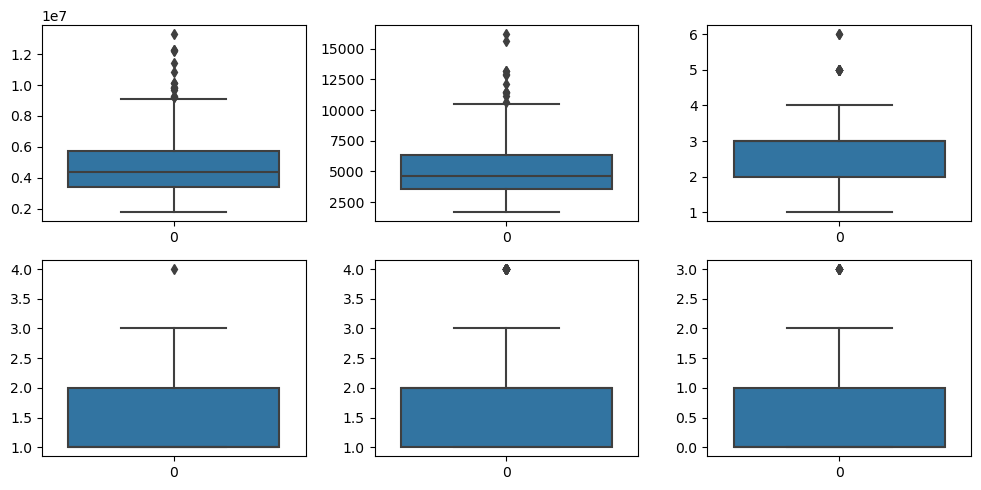

In [110]:
fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(housing['price'],ax=axs[0,0])
plt2=sns.boxplot(housing['area'],ax=axs[0,1])
plt3=sns.boxplot(housing['bedrooms'],ax=axs[0,2])
plt1=sns.boxplot(housing['bathrooms'],ax=axs[1,0])
plt2=sns.boxplot(housing['stories'],ax=axs[1,1])
plt3=sns.boxplot(housing['parking'],ax=axs[1,2])
plt.tight_layout()

In [111]:
varlist=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes':1,'no':0})

housing[varlist]=housing[varlist].apply(binary_map)

In [112]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [113]:
status=pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [114]:
varlist=['furnished','semi-furnished','unfurnished']
def binary_map(x):
    return x.map({False:1,True:0})

status[varlist]=status[varlist].apply(binary_map)
status.head()

,furnished,semi-furnished,unfurnished
0,0,1,1
1,0,1,1
2,1,0,1
3,0,1,1
4,0,1,1


In [115]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [116]:
varlist=['semi-furnished','unfurnished']
def binary_map(x):
    return x.map({False:1,True:0})

status[varlist]=status[varlist].apply(binary_map)
status.head()

,semi-furnished,unfurnished
0,1,1
1,1,1
2,0,1
3,1,1
4,1,1


In [117]:
housing=pd.concat([housing,status],axis=1)


In [118]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,1


In [119]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [120]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,1


In [121]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(housing,train_size=0.7,test_size =0.3,random_state=100)

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler=MinMaxScaler()

In [124]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [125]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1,0
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,1
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,1
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1,0


In [126]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.585302,0.674541
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


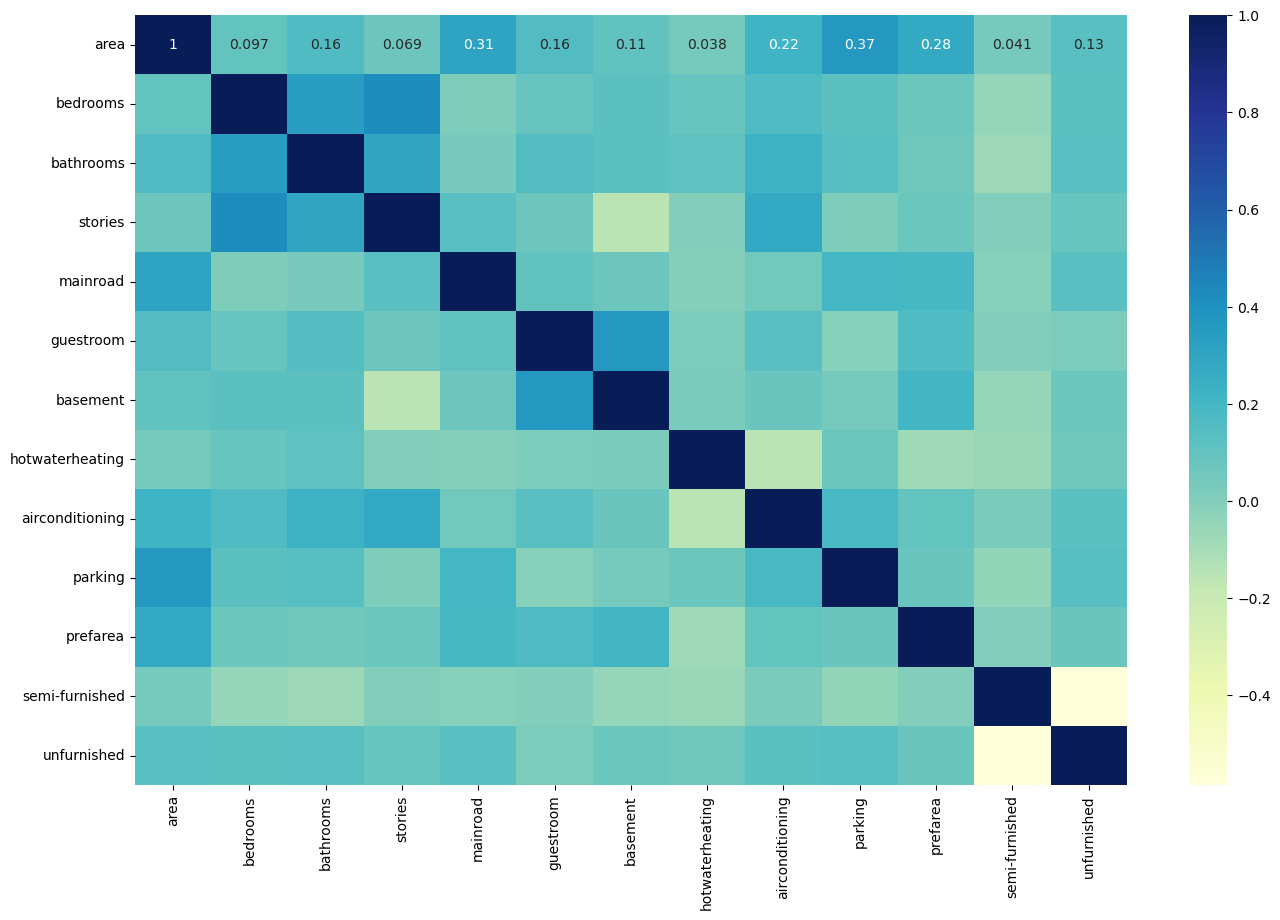

In [141]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [140]:
rfe = RFE(lm,6)             # running RFE
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [128]:
y_train = df_train.pop('price')
X_train = df_train

In [129]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [134]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [140]:
rfe = RFE(lm,6)             # running RFE
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [139]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 5),
 ('basement', False, 7),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 6)]